<a href="https://colab.research.google.com/github/davis689/binder/blob/master/Critical_Points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Critical Point


In [ ]:
!pip install sympy # Not generally necessary but this solves 'No module named sympy' errors.

Import some key functions from SymPy to handle symbolic manipulations.

In [ ]:
from sympy import diff, integrate, solve, Eq, symbols, Symbol, init_printing
from sympy.plotting import plot
init_printing()

In [ ]:
p,V,T,pc,Vc,Tc,pr,Vr,Tr=symbols("p,V_m,T,p_c,V_c,T_c,p_r,V_r,T_r",positive=True, real=True) # Setup variables
R,a,b=symbols("R, a, b", positive=True,real=True,constant=True) # Setup constants

The critical point is the temperature, pressure and volume where the isotherm goes through an inflection point. Since at an inflection point the first and second derivatives are zero, we can use these equations plus the equation of state to solve for the critical parameters.

First we set up the eos, and the two derivatives.

In [ ]:
p_expr=R*T/(V-b)-a/V**2
#p_expr=R*T/(V-b)-a/(sp.sqrt(T)*V*(V+b))
dp=diff(p_expr,V)   # take the derivative (diff) of p_expr with respect to V
ddp=diff(p_expr,V,2) # take the 2nd derivative (diff) of p_expr with respect to V

Here we use these expressions to set up the equations using SymPy's Eq function. Here the parentheses are filled with both sides of the equation separated by a comma. The results are displayed.

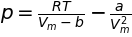

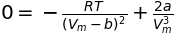

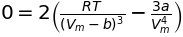

In [ ]:
p_eq=Eq(p,p_expr) # so p equals what we defined as p_expr above 
dp_eq=Eq(0,dp)  # at critical point the derivative is zero so assign that here
ddp_eq=Eq(0,ddp) # likewise
display(p_eq,dp_eq,ddp_eq) # display all three equations that we just defined so that we can see if they are correct


Now to solve for the critical parameters, we use solve. The answer to the solve function is always a list. The , after critpoint makes solve only return the solution which is itself a list of the three critical parameters. We can assign these to variables.

In [ ]:
critpoint,=solve([p_eq,dp_eq,ddp_eq],[p,V,T]) # solve the three equations for the three unknowns.
pc,Vc,Tc=[critpoint[i] for i in range(len(critpoint))] #assign the solutions above to the variables pc, Vc, and Tc for possible use later.
display(pc,Vc,Tc) # display the results

## Law of Corresponding States
Since we have the critical temperatures, pressures, and volumes in terms of van der Waals parameters, we can use them to find a real gas equation of state that is the same for all gases. First define *reduced* variables, $p_r$, $V_r$, and $T_r$ such that $p_r=p/p_c$, $V_r=V/V_c$, and $T_r=T/T_c$. Use these definitions to substitute for $p, V$, and $T$.
The result is an equation that has no $a$ or $b$ parameters. It says that as a fraction of the way to the critical point, every gas behaves the same. Of course, he applicability of this equation depends on the applicability of the equation of state we've chosen.

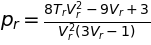

In [ ]:
Vr,pr,Tr=sp.symbols("V_r,p_r,T_r")
cs_eos=sp.Eq(p_expr.subs({V:Vc*Vr,T:Tc*Tr}).subs({Tc:Tc,Vc:Vc}),pc*pr.subs(pc,pc))# Setup equation and substitute reduced and critical values into it.
lcs=sp.Eq(pr,solve(cs_eos,pr)[0]) # solve equation for pr (which will result in only the right hand side of the equation) and write as an equation.
display(lcs)

This version of the law of corresponding states is similar in that it contains no van der Waals parameters but it is arranged differently from the one we saw in class. However, you can easily divide the denominator into the first numerator term and into the combined second two terms to rearrange into the form we saw.